In [1]:
import warnings
warnings.filterwarnings("ignore")
import jieba    #分词包
import numpy    #numpy计算包
import codecs   #codecs提供的open方法来指定打开的文件的语言编码，它会在读取的时候自动转换为内部unicode 
import pandas as pd  
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
from wordcloud import WordCloud#词云包

In [2]:
df = pd.read_csv("../data/text/home_news.csv", encoding='utf-8')
df = df.dropna()
content=df.content.values.tolist()

segment=[]
for line in content:
    try:
        segs=jieba.lcut(line)
        for seg in segs:
            if len(seg)>1 and seg!='\r\n':
                segment.append(seg)
    except:
        print (line)
        continue

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\kevin\AppData\Local\Temp\jieba.cache
Loading model cost 1.813 seconds.
Prefix dict has been built succesfully.


In [3]:
#去停用词
words_df=pd.DataFrame({'segment':segment})
#words_df.head()
stopwords=pd.read_csv("../data/text/stopwords.txt",index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8')#quoting=3全不引用
#stopwords.head()
words_df=words_df[~words_df.segment.isin(stopwords.stopword)]

In [4]:
#统计词频
words_stat=words_df.groupby(by=['segment'])['segment'].agg({"计数":numpy.size})
words_stat=words_stat.reset_index().sort_values(by=["计数"],ascending=False)
words_stat.head()

,segment,计数
18652,中国,37158
42437,发展,32287
61877,工作,27577
65306,建设,19686
49165,国家,19540


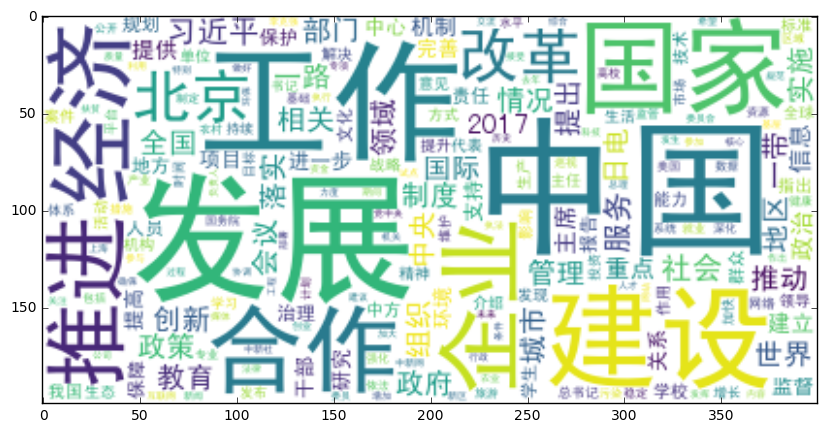

In [5]:
#做词云
wordcloud=WordCloud(font_path="../data/text/simhei.ttf",background_color="white",max_font_size=80)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)